### Data extraction
Extract data from MIMIC-III

In [1]:
import time
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# import re

# import plotly.graph_objs as go
# import plotly.plotly as py
import cufflinks
# from IPython.core.interactiveshell import InteractiveShell
# import plotly.figure_factory as ff
# InteractiveShell.ast_node_interactivity = 'all'
# from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [2]:
# Import pandas 
import pandas as pd 

start = time.time()
# reading csv file 
admissions_df = pd.read_csv("../datasets/mmc-3/ADMISSIONS.csv")
noteevents_df = pd.read_csv("../datasets/mmc-3/NOTEEVENTS.csv") 
end = time.time()
print(end - start)


/home/evan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.



29.7219295501709


In [3]:
# diagnosis = df.DIAGNOSIS.unique()
# #PNEUMONIA
# for i in diagnosis:
#     print(f"[{i}]")
# data = df.copy()
# data.info()

# pneumonia_df = data.loc[df['DIAGNOSIS'] == 'PNEUMONIA']
# pneumonia_df.info()

In [4]:
admissions_df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [5]:
noteevents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083180 entries, 0 to 2083179
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ROW_ID       int64  
 1   SUBJECT_ID   int64  
 2   HADM_ID      float64
 3   CHARTDATE    object 
 4   CHARTTIME    object 
 5   STORETIME    object 
 6   CATEGORY     object 
 7   DESCRIPTION  object 
 8   CGID         float64
 9   ISERROR      float64
 10  TEXT         object 
dtypes: float64(3), int64(2), object(6)
memory usage: 174.8+ MB


In [6]:
admissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

In [7]:
# https://towardsdatascience.com/left-join-with-pandas-data-frames-in-python-c29c85089ba4
# left_join = noteevents_df.join(admissions_df.set_index('HADM_ID'), on='HADM_ID')
# left_join = noteevents_df.set_index('HADM_ID').join(admissions_df.set_index('HADM_ID'))
"""
>>> left
  transaction_id user_id     value
0              A   Peter  1.867558
1              B    John -0.977278
2              C    John  0.950088
3              D    Anna -0.151357
>>> right
  user_id favorite_color
0    Paul           blue
1    Mary           blue
2    John            red
3    Anna            NaN

---------
>>> left.merge(right, on='user_id', how='left', indicator=True)
  transaction_id user_id     value favorite_color     _merge
0              A   Peter  1.867558            NaN  left_only
1              B    John -0.977278            red       both
2              C    John  0.950088            red       both
3              D    Anna -0.151357            NaN       both

---------
left.merge(right.rename({'user_id': 'user_id_r'}, axis=1),
               left_on='user_id', right_on='user_id_r', how='left')
               
  transaction_id user_id     value user_id_r favorite_color
0              A   Peter  1.867558       NaN            NaN
1              B    John -0.977278      John            red
2              C    John  0.950088      John            red
3              D    Anna -0.151357      Anna            NaN
---------
select
    t.transaction_id
    , t.user_id
    , t.value
    , u.user_id as user_id_r
    , u.favorite_color
from
    transactions t
    left join
    users u
    on t.user_id = u.user_id
;
"""

"\n>>> left\n  transaction_id user_id     value\n0              A   Peter  1.867558\n1              B    John -0.977278\n2              C    John  0.950088\n3              D    Anna -0.151357\n>>> right\n  user_id favorite_color\n0    Paul           blue\n1    Mary           blue\n2    John            red\n3    Anna            NaN\n\n---------\n>>> left.merge(right, on='user_id', how='left', indicator=True)\n  transaction_id user_id     value favorite_color     _merge\n0              A   Peter  1.867558            NaN  left_only\n1              B    John -0.977278            red       both\n2              C    John  0.950088            red       both\n3              D    Anna -0.151357            NaN       both\n\n---------\nleft.merge(right.rename({'user_id': 'user_id_r'}, axis=1),\n               left_on='user_id', right_on='user_id_r', how='left')\n               \n  transaction_id user_id     value user_id_r favorite_color\n0              A   Peter  1.867558       NaN            Na

In [8]:
start = time.time()
# Left join of two dataframes
note_admiss_df_left = noteevents_df.merge(admissions_df, on='HADM_ID', how='left', indicator=True)
end = time.time()
print(end - start)

3.7975821495056152


In [9]:
note_admiss_df_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083180 entries, 0 to 2083179
Data columns (total 30 columns):
 #   Column                Dtype   
---  ------                -----   
 0   ROW_ID_x              int64   
 1   SUBJECT_ID_x          int64   
 2   HADM_ID               float64 
 3   CHARTDATE             object  
 4   CHARTTIME             object  
 5   STORETIME             object  
 6   CATEGORY              object  
 7   DESCRIPTION           object  
 8   CGID                  float64 
 9   ISERROR               float64 
 10  TEXT                  object  
 11  ROW_ID_y              float64 
 12  SUBJECT_ID_y          float64 
 13  ADMITTIME             object  
 14  DISCHTIME             object  
 15  DEATHTIME             object  
 16  ADMISSION_TYPE        object  
 17  ADMISSION_LOCATION    object  
 18  DISCHARGE_LOCATION    object  
 19  INSURANCE             object  
 20  LANGUAGE              object  
 21  RELIGION              object  
 22  MARITAL_STATUS    

In [10]:
note_admiss_df_left.shape

(2083180, 30)

In [11]:
# df1 = df[['a','b']]
note_admiss_df_left[['DIAGNOSIS', 'SUBJECT_ID_x', 'SUBJECT_ID_y','DESCRIPTION', 'CATEGORY']]

,DIAGNOSIS,SUBJECT_ID_x,SUBJECT_ID_y,DESCRIPTION,CATEGORY
0,RT LOWER LOBE PNEUMONIA,22532,22532.0,Report,Discharge summary
1,CHRONIC OBSTRUCTIVE PULMONARY DISEASE,13702,13702.0,Report,Discharge summary
2,TRACHEALBRONCHEAL MALACEA/SDA,13702,13702.0,Report,Discharge summary
3,ASTHMA;COPD EXACERBATION,13702,13702.0,Report,Discharge summary
4,S/P FALL;TELEMETRY,26880,26880.0,Report,Discharge summary
...,...,...,...,...,...
2083175,NEWBORN,31097,31097.0,Report,Nursing/other
2083176,NEWBORN,31097,31097.0,Report,Nursing/other
2083177,NEWBORN,31097,31097.0,Report,Nursing/other
2083178,NEWBORN,31097,31097.0,Report,Nursing/other


In [12]:
pneumonia_df = note_admiss_df_left.loc[note_admiss_df_left["DIAGNOSIS"] == 'PNEUMONIA', ['ROW_ID_x', 'SUBJECT_ID_x', 'HADM_ID', 'CHARTDATE', 'CHARTTIME', 'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'DIAGNOSIS', 'HAS_CHARTEVENTS_DATA']]

In [13]:
pneumonia_df.shape

(59727, 17)

In [14]:
pneumonia_df['CATEGORY'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of notes', 
                                                                title='Number of category kinds in noteevents')

In [15]:
#pneumonia_no_disch_df = pneumonia_df.loc[pneumonia_df["CATEGORY"] != 'Discharge summary', ['ROW_ID_x', 'SUBJECT_ID_x', 'HADM_ID', 'CHARTDATE', 'CHARTTIME', 'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'DIAGNOSIS', 'HAS_CHARTEVENTS_DATA']]
pneumonia_no_disch_df = pneumonia_df.loc[pneumonia_df["CATEGORY"] != 'Discharge summary', ['ROW_ID_x','SUBJECT_ID_x','CHARTDATE','STORETIME','CATEGORY','DESCRIPTION','TEXT', 'DEATHTIME']]

In [16]:
pneumonia_no_disch_df['CATEGORY'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of notes', 
                                                                title='Number of category kinds in noteevents')

In [17]:
pneumonia_no_disch_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58029 entries, 59103 to 2066669
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ROW_ID_x      58029 non-null  int64 
 1   SUBJECT_ID_x  58029 non-null  int64 
 2   CHARTDATE     58029 non-null  object
 3   STORETIME     40888 non-null  object
 4   CATEGORY      58029 non-null  object
 5   DESCRIPTION   58029 non-null  object
 6   TEXT          58029 non-null  object
 7   DEATHTIME     11895 non-null  object
dtypes: int64(2), object(6)
memory usage: 4.0+ MB


In [18]:
pneumonia_no_disch_df.shape

(58029, 8)

In [19]:
pneumonia_alive_no_disch = pneumonia_no_disch_df[pneumonia_no_disch_df.DEATHTIME.isnull()]
pneumonia_dead_no_disch = pneumonia_no_disch_df[pneumonia_no_disch_df.DEATHTIME.notnull()]

In [20]:
pneumonia_dead_no_disch.shape

(11895, 8)

In [21]:
pneumonia_alive_no_disch.shape

(46134, 8)

In [22]:
pneumonia_alive_no_disch = pneumonia_alive_no_disch.sort_values(by=['SUBJECT_ID_x','CHARTDATE', 'ROW_ID_x'])
pneumonia_dead_no_disch = pneumonia_dead_no_disch.sort_values(by=['SUBJECT_ID_x','CHARTDATE', 'ROW_ID_x'])

In [23]:
pneumonia_alive_no_disch['CATEGORY'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of notes', 
                                                                title='Number of category kinds in pneumonia alive')

In [24]:
pneumonia_dead_no_disch['CATEGORY'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of notes', 
                                                                title='Number of category kinds in pneumonia alive')

In [25]:
pneumonia_alive_no_disch

,ROW_ID_x,SUBJECT_ID_x,CHARTDATE,STORETIME,CATEGORY,DESCRIPTION,TEXT,DEATHTIME
137480,149869,68,2173-12-15,NaN,ECG,Report,Sinus tachycardia. Compared to the previous tr...,NaN
137481,149870,68,2173-12-15,NaN,ECG,Report,Sinus rhythm. Delayed anterior precordial R wa...,NaN
1259578,1261173,68,2173-12-16,2173-12-16 05:09:00,Nursing/other,Report,Micu nsg admission note\n41yo female with AIDS...,NaN
1259579,1261174,68,2173-12-16,2173-12-16 17:08:00,Nursing/other,Report,NSG 0700-1900\nEvents: Attempted eating breakf...,NaN
1258821,1261175,68,2173-12-16,2173-12-16 17:18:00,Nursing/other,Report,Resp Care\n\nSputum induction obtained for PCP...,NaN
...,...,...,...,...,...,...,...,...
1129253,1138542,99937,2128-05-11,NaN,Radiology,CHEST (PORTABLE AP),[**2128-5-11**] 11:57 AM\n CHEST (PORTABLE AP)...,NaN
1129150,1138569,99937,2128-05-11,NaN,Radiology,"CTA CHEST W&W/O C&RECONS, NON-CORONARY",[**2128-5-11**] 1:44 PM\n CTA CHEST W&W/O C&RE...,NaN
148040,130595,99937,2128-05-12,NaN,ECG,Report,Normal sinus rhythm. Compared to tracing #1 no...,NaN
1129514,1138666,99937,2128-05-12,NaN,Radiology,CHEST (PORTABLE AP),[**2128-5-12**] 7:27 AM\n CHEST (PORTABLE AP) ...,NaN


In [26]:
# Number of patients
pneumonia_dead_no_disch['SUBJECT_ID_x'].nunique()

252

In [27]:
# Number of patients
pneumonia_alive_no_disch['SUBJECT_ID_x'].nunique()

1167

In [28]:
# import text handling tool
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from collections import Counter

import sys
import re
import csv
import os.path

# define constants
# RESULT_HEADER = "WORD, FREQUENCY\n"
MIN_SEQ_LEN = 4
USE_1_N_SEQ = 2


# words that do not have meaning (can be modified later)
USELESS_WORDS = ["a", "the", "he", "she", ",", ".", "?", "!", ":", ";", "+", "*", "**"\
                 "your", "you"]

# count up the frequency of every word in every disease file
stemmer = PorterStemmer()
# create set of words to ignore in text
stop_words = set(stopwords.words('english'))

for word in USELESS_WORDS:
    stop_words.add(word)

In [29]:

#----------
def count_notes_per_patient(disease_df):
    patient_id_to_num_notes = {}
    patient_id = -1
    note_counter = 0
            
    for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):
        patient_id_check = int(row['SUBJECT_ID_x'])
                
        if not patient_id == patient_id_check:
            patient_id_to_num_notes[patient_id] = note_counter
            note_counter = 1
        else:
            note_counter += 1
                    
        patient_id = patient_id_check
                
    patient_id_to_num_notes[patient_id] = note_counter
    del patient_id_to_num_notes[-1]
    return patient_id_to_num_notes

patient_id_to_num_notes = {}
patient_id_to_num_notes['pneumonia_dead'] = count_notes_per_patient(pneumonia_dead_no_disch)
patient_id_to_num_notes['pneumonia_alive'] = count_notes_per_patient(pneumonia_alive_no_disch)

100%|██████████| 46134/46134 [00:04<00:00, 9594.59it/s] 


In [30]:
patient_id_to_num_notes

{'pneumonia_dead': {111: 12,
  346: 25,
  404: 3,
  546: 6,
  618: 16,
  705: 15,
  726: 48,
  1039: 55,
  1556: 37,
  1872: 3,
  1944: 56,
  2286: 69,
  2990: 166,
  3055: 29,
  3099: 13,
  3201: 8,
  3526: 7,
  3773: 6,
  3881: 20,
  4122: 51,
  4754: 101,
  4811: 21,
  5476: 1,
  5494: 22,
  5774: 104,
  5786: 152,
  5913: 1,
  6133: 68,
  6735: 13,
  6745: 13,
  6973: 36,
  6981: 8,
  7277: 66,
  7310: 8,
  7924: 9,
  7977: 9,
  9908: 11,
  9984: 15,
  10302: 100,
  10510: 86,
  10545: 10,
  10642: 10,
  11049: 14,
  11209: 9,
  11395: 41,
  12530: 24,
  12849: 50,
  13098: 46,
  13566: 23,
  14125: 9,
  14514: 96,
  14965: 25,
  15159: 15,
  15251: 11,
  15396: 17,
  15566: 37,
  15853: 45,
  16275: 17,
  16344: 27,
  16622: 51,
  16684: 29,
  17122: 16,
  17354: 5,
  17802: 64,
  17983: 65,
  18094: 23,
  18736: 35,
  18768: 46,
  18848: 205,
  18971: 26,
  19243: 25,
  19323: 6,
  19390: 21,
  19463: 20,
  19535: 59,
  19754: 13,
  19827: 22,
  19833: 58,
  19872: 10,
  20006: 8

In [31]:
print(len(patient_id_to_num_notes['pneumonia_dead']))
print(len(patient_id_to_num_notes['pneumonia_alive']))

252
1167


In [32]:
pneumonia_dead_no_disch.loc[pneumonia_dead_no_disch["SUBJECT_ID_x"] == 111, ['ROW_ID_x','SUBJECT_ID_x','DESCRIPTION','TEXT', 'DEATHTIME']]

,ROW_ID_x,SUBJECT_ID_x,DESCRIPTION,TEXT,DEATHTIME
70391,70124,111,Report,PATIENT/TEST INFORMATION:\nIndication: s/p PEA...,2144-07-01 14:55:00
142529,151749,111,Report,Compared to the previous tracing QRS voltage i...,2144-07-01 14:55:00
142097,151750,111,Report,"Normal sinus rhythm, rate 80. Biatrial abnorm...",2144-07-01 14:55:00
142303,151751,111,Report,Normal sinus rhythm. Q waves in leads V1-V2 c...,2144-07-01 14:55:00
380576,375732,111,Physician Resident Admission Note,Chief Complaint: respiratory distress\n HPI...,2144-07-01 14:55:00
380109,375744,111,ICU Event Note,Clinician: Nurse\n Pt admitted from the ED ...,2144-07-01 14:55:00
379907,375749,111,Physician Resident/Attending Admission Note - ...,Chief Complaint: respiratory distress\n HPI...,2144-07-01 14:55:00
379806,375753,111,Social Work Admission Note,Social Work Initial Note:\n Family Informati...,2144-07-01 14:55:00
379909,375760,111,ICU Event Note,TITLE:\n Clinician: Resident\n Patient ex...,2144-07-01 14:55:00
1066971,1079317,111,CHEST (PORTABLE AP),[**2144-7-1**] 2:43 AM\n CHEST (PORTABLE AP) ...,2144-07-01 14:55:00


In [33]:
def count_words_per_patient(disease_df, patient_id_to_num_notes):
    note_appearance_counter = {}
    number_of_patients = 0 # number of patients
    note_counter = 0

# -----------
    patient_id = -1
    word_set = set()
    note_event_counter = 0

    # Iterate through each note
    for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):

        
        patient_id_check = int(row['SUBJECT_ID_x'])
    
        # if patient id has changed, end sequence and start new sequence
        if not patient_id == patient_id_check:
            number_of_patients += 1
            note_event_counter = 0
        
            for word in word_set:
                if word in note_appearance_counter:
                    note_appearance_counter[word] += 1
                else:
                    note_appearance_counter[word] = 1

        
            # reset word_set
            word_set = set()
        
        # update patient id
        patient_id = patient_id_check

            
        if patient_id_to_num_notes[patient_id_check] <= MIN_SEQ_LEN:
            continue
            
        if note_event_counter < patient_id_to_num_notes[patient_id] // USE_1_N_SEQ:
            note_event_counter += 1
            continue
                
        note_counter += 1
        note = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', row['TEXT'])
        tokenized_note = word_tokenize(note)
        
        
        for word in tokenized_note:
            stemmed_word = stemmer.stem(word.lower())
            if not stemmed_word in stop_words:
                word_set.add(stemmed_word)
    
    print(str(note_counter) + " note events")
    print("finished counting frequent words for patients!")
#     return note_counter, note_appearance_counter
    return number_of_patients, note_appearance_counter

# variable dictionaries
number_of_notes = {}
note_appearance_counter = {}

number_of_notes['pneumonia_dead'], note_appearance_counter['pneumonia_dead'] = count_words_per_patient(pneumonia_dead_no_disch, patient_id_to_num_notes['pneumonia_dead'])
number_of_notes['pneumonia_alive'], note_appearance_counter['pneumonia_alive'] = count_words_per_patient(pneumonia_alive_no_disch, patient_id_to_num_notes['pneumonia_alive'])

  0%|          | 12/46134 [00:00<06:35, 116.53it/s]

5989 note events
finished counting frequent words for patients!


100%|██████████| 46134/46134 [02:33<00:00, 301.24it/s]

23172 note events
finished counting frequent words for patients!


In [34]:
number_of_notes

{'pneumonia_dead': 252, 'pneumonia_alive': 1167}

In [35]:
print(note_appearance_counter)

{'pneumonia_dead': {'underli': 79, 'servic': 92, 'contour': 68, 'social': 138, 'heent': 34, 'gtt': 134, 'licsw': 11, 'portabl': 178, 'g': 96, 'inflammatori': 22, 'point': 75, 'voltag': 35, 'also': 175, 'person': 33, 'mmhg': 71, 'vap': 72, 'agenc': 1, 'code': 135, 'histori': 173, 'girlfriend': 2, 'nodular': 15, 'onli': 153, 'might': 41, 'arriv': 82, 'stabl': 177, 'inform': 122, 'allergi': 82, 'involv': 85, 'consist': 152, 'repeat': 107, 'repres': 91, 'arrang': 21, 'manag': 90, 'lvef': 38, 'clergi': 16, 'spent': 65, 'start': 154, 'murmur': 42, 'regular': 66, 'spokesperson': 10, 'logist': 2, 'emphas': 19, 'show': 131, 'mode': 73, 'process': 94, 'form': 38, 'anterior': 62, 'concern': 114, 'may': 142, 'review': 135, 'ptt': 80, 'gaug': 57, 'abov': 158, 'rel': 59, 'woman': 83, 'cultur': 100, 'attempt': 119, 'sever': 172, 'offer': 47, 'electrolyt': 43, 'distress': 118, 'develop': 87, 'chief': 63, 'given': 180, 'gener': 124, 'anur': 28, 'today': 148, 'unsuccess': 37, 'hi': 121, 'region': 80, 'r

In [149]:
# # get hyper-paramters n_fold and threshold from user input
n_fold = float(1)
threshold = float(0.01)

frequent_word_lists = {}
factor = {}

In [150]:
"""function description:
for each disease in note_appearance_counter
    1. checks whether a word in disease file is frequent(frequency standard as defined by factor, n_fold, and threshold)
    2. adds to frequent_word_list
"""

# def find_frequent_word(note_appearance_counter, frequent_word_lists, number_of_notes, factor, n_fold, threshold):

# calculate normalizing factor for each disease
note_sum = 0

# Count from two labels
for disease in number_of_notes:
    note_sum += float(number_of_notes[disease])
    
for disease in number_of_notes:
    factor[disease] = number_of_notes[disease] / note_sum

# determine frequent word for each disease file
for disease in note_appearance_counter:
    frequent_word_lists[disease] = []

    print(disease + " has " + str(len(note_appearance_counter[disease])) + " unique words!")

    for word in note_appearance_counter[disease]:
        
        freq_check = True
        for check_disease in note_appearance_counter:
            
            if not disease == check_disease:
                if word in note_appearance_counter[check_disease]:
                    if not (note_appearance_counter[disease][word] / note_appearance_counter[check_disease][word] / factor[disease] * factor[check_disease] > n_fold \
                        and note_appearance_counter[disease][word] > (number_of_notes[disease] * threshold)):

                        freq_check = False
                        break

                else:
                    if not (note_appearance_counter[disease][word] > n_fold and note_appearance_counter[disease][word] > (number_of_notes[disease] * threshold)):
                        freq_check = False
                        break
        if freq_check:
            frequent_word_lists[disease].append((word))
            # Create a tuple of word and its count
#             frequent_word_lists[disease].append((word, note_appearance_counter[disease][word]))

        

print("finished making frequent words list for " + disease)

pneumonia_dead has 11678 unique words!
pneumonia_alive has 22572 unique words!
finished making frequent words list for pneumonia_alive


In [151]:
print(note_sum)
print(factor)

# number of notes
# 58029.0
# {'pneumonia_dead': 0.2049837150390322, 'pneumonia_alive': 0.7950162849609678}

1419.0
{'pneumonia_dead': 0.17758985200845667, 'pneumonia_alive': 0.8224101479915433}


In [152]:
print(len(frequent_word_lists['pneumonia_dead']))
print(len(frequent_word_lists['pneumonia_alive']))

# n_fold = float(3) threshold = float(0.01)
# 454
# 329

# n_fold = float(1) threshold = float(0.01)
# 914
# 600

# n_fold = float(1) threshold = float(0.01)
# 3320
# 2196

3320
2196


In [153]:
print(frequent_word_lists)

{'pneumonia_dead': ['underli', 'servic', 'social', 'gtt', 'licsw', 'portabl', 'inflammatori', 'point', 'voltag', 'also', 'vap', 'code', 'onli', 'might', 'arriv', 'stabl', 'inform', 'allergi', 'involv', 'consist', 'repeat', 'repres', 'arrang', 'manag', 'clergi', 'spent', 'start', 'spokesperson', 'show', 'mode', 'process', 'concern', 'may', 'review', 'ptt', 'abov', 'rel', 'cultur', 'attempt', 'sever', 'offer', 'electrolyt', 'distress', 'develop', 'given', 'gener', 'anur', 'today', 'unsuccess', 'hi', 'receiv', 'profound', 'prepar', 'ischem', 'issu', 'wbc', 'left', 'comparison', 'cxr', 'puls', 'dose', 'chest', 'f', 'termin', 'continu', 'rr', 'mandat', 'pcv', 'metabol', 'apic', 'mix', 'reason', 'et', 'norepinephrin', 'tachycardia', 'want', 'entir', 'eeg', 'prior', 'statin', 'cvp', 'extens', 'adjust', 'pneumonia', 'obtain', 'famili', 'cm', 'blood', 'vasopressin', 'daughter', 'sign', 'cmh', 'contact', 'sick', 'portion', 'addit', 'acl', 'sbp', 'bradi', 'renal', 'differenti', 'micu', 'sepsi', '

### 2. Co-occurrence generation
FP-growth

In [154]:
FREQUENT_WORD_LIST = frequent_word_lists['pneumonia_dead'] + frequent_word_lists['pneumonia_alive']

In [155]:
"""function description:
generates frequent word set for the disease
"""
word_dict = {}
word_id = 1
stemmer = PorterStemmer()


for word in FREQUENT_WORD_LIST:
    if not word == "WORD":
        word_dict[stemmer.stem(word.strip())] = word_id
        word_id += 1
             
print("\nword dictionary created!\n")
print(word_dict)



word dictionary created!

{'underli': 1, 'servic': 2, 'social': 3, 'gtt': 4, 'licsw': 5, 'portabl': 6, 'inflammatori': 7, 'point': 8, 'voltag': 9, 'also': 10, 'vap': 11, 'code': 12, 'onli': 13, 'might': 14, 'arriv': 15, 'stabl': 16, 'inform': 17, 'allergi': 18, 'involv': 19, 'consist': 20, 'repeat': 21, 'repr': 22, 'arrang': 23, 'manag': 24, 'clergi': 25, 'spent': 26, 'start': 27, 'spokesperson': 28, 'show': 29, 'mode': 30, 'process': 31, 'concern': 32, 'may': 33, 'review': 34, 'ptt': 35, 'abov': 36, 'rel': 37, 'cultur': 38, 'attempt': 39, 'sever': 40, 'offer': 41, 'electrolyt': 42, 'distress': 43, 'develop': 44, 'given': 45, 'gener': 46, 'anur': 47, 'today': 48, 'unsuccess': 49, 'hi': 50, 'receiv': 51, 'profound': 52, 'prepar': 53, 'ischem': 54, 'issu': 55, 'wbc': 56, 'left': 57, 'comparison': 58, 'cxr': 59, 'pul': 1696, 'dose': 61, 'chest': 62, 'f': 63, 'termin': 64, 'continu': 65, 'rr': 66, 'mandat': 67, 'pcv': 68, 'metabol': 69, 'apic': 70, 'mix': 71, 'reason': 72, 'et': 73, 'nore

### Implementetion with python for FP_growth

In [156]:
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/

#TODO: Left for automazation
# import os
# import operator
# from pathlib import Path
# from mlxtend.frequent_patterns import fpgrowth
# from mlxtend.preprocessing import TransactionEncoder
# import pandas as pd
# import math

# # ----
# def fp_growth_input_per_note_py(disease_df0, disease_df1, word_dict, min_support):
#     def count_cooc(disease_df):
#         # For dataframe
#         note_list = []

#         # read line in from file (each line is one note)
#         for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):
        
#             # only regard certain type of notes
#             word_set = set()
#             note = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', row['TEXT'])
#             tokenized_note = word_tokenize(note)

#             # loop through each word in note to count word belonging to each disease
#             for word in tokenized_note:
#                 stemmed_word = stemmer.stem(word.lower())
#                 if stemmed_word in word_dict:
#                     word_set.add(stemmed_word)

#             templst = []
#             for word in word_set:
#                 if word in word_dict:
#                     templst.append(word)

#             # templst.sort()
#             if templst:
#                 note_list.append(templst)


#         te = TransactionEncoder()
#         te_ary = te.fit(note_list).transform(note_list)
#         df = pd.DataFrame(te_ary, columns=te.columns_)
#         df_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)
#         df_itemsets   
#         cooc_tmp = []
#         cooc_minsup_tmp = []
#         node_index = []
#         node_minsup = []

#         for index, row in df_itemsets.iterrows():
#             if len(row['itemsets']) == 1:
            
#                 node_index.append(row['itemsets'])
#                 node_minsup.append(row['support'])
# #                 node_minsup.append(len(note_list) * row['support'])
                
#             elif len(row['itemsets']) == 2:
#                 cooc_ = sorted(list(row['itemsets']))
#                 cooc_tmp.append(cooc_)
#                 cooc_minsup_tmp.append(len(note_list) * row['support'])

#         cooc_dict = {}
#         for num, i in enumerate(cooc_tmp):
#             if tuple(i) not in cooc_dict:
#                 cooc_dict[tuple(i)] = cooc_minsup_tmp[num]
        
#         # dictionary = dict(zip(keys, values))
#         node_dict = {}
#         for num, i in enumerate(node_index):
#             if i not in node_dict:
#                 cooc_dict[tuple(i)] = cooc_minsup_tmp[num]
        
#         return cooc_dict
    
#     # Dictionary for each coocurrence with their support
#     cooc_0 = count_cooc(disease_df0)
#     cooc_1 = count_cooc(disease_df1)
    
#     key_set = set()
 
#     for k,_ in cooc_0.items():
#         key_set.add(k)
    
#     for k,_ in cooc_1.items():
#         key_set.add(k)
        
#     # Get the set of coocurrencies from two groups
#     # Count log_odd_score
#     cooc_odd_scores = {}
#     for set_item in key_set:
#         if set_item in cooc_0 and set_item in cooc_1: #TODO: Normalization of the data
#             d_prob = cooc_0[set_item]/(cooc_0[set_item] + cooc_1[set_item])
#             a_prob = cooc_1[set_item]/(cooc_0[set_item] + cooc_1[set_item])
#             log_odd_score = math.log((d_prob + 0.001)/(a_prob+0.001))
#             cooc_odd_scores[set_item] = log_odd_score
#         elif set_item in cooc_0:
#             log_odd_score = math.log((1.001)/(0.001))
#             cooc_odd_scores[set_item] = log_odd_score
            
#         elif set_item in cooc_1:
#             log_odd_score = math.log((0.001)/(1.001))
#             cooc_odd_scores[set_item] = log_odd_score
            
#     return cooc_odd_scores
        
    

    
# cooc_odd_scores = fp_growth_input_per_note_py(pneumonia_dead_no_disch, pneumonia_alive_no_disch, word_dict, 0.01)

In [158]:
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/
import os
import operator
from pathlib import Path
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import math

# ----
def count_cooc(disease_df, word_dict, min_support):
    # For dataframe
    note_list = []

    # read line in from file (each line is one note)
    for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):
        
        # only regard certain type of notes
        word_set = set()
        note = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', row['TEXT'])
        tokenized_note = word_tokenize(note)

        # loop through each word in note to count word belonging to each disease
        for word in tokenized_note:
            stemmed_word = stemmer.stem(word.lower())
            if stemmed_word in word_dict:
                word_set.add(stemmed_word)

        templst = []
        for word in word_set:
            if word in word_dict:
                templst.append(word)

        # templst.sort()
        if templst:
            note_list.append(templst)


    te = TransactionEncoder()
    te_ary = te.fit(note_list).transform(note_list)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    df_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
    df_itemsets   
    cooc_tmp = []
    cooc_minsup_tmp = []
    node_index = []
    node_minsup = []

    for index, row in df_itemsets.iterrows():
        if len(row['itemsets']) == 1:
            min_sup = row['support']
            node_index.append(list(row['itemsets'])[0])
            node_minsup.append(len(note_list) * row['support'])

        if len(row['itemsets']) == 2:
            cooc_ = sorted(list(row['itemsets']))
            cooc_tmp.append(cooc_)
            cooc_minsup_tmp.append(len(note_list) * row['support'])
    


    cooc_dict = {}

    for num, i in enumerate(cooc_tmp):
        if tuple(i) not in cooc_dict:
            cooc_dict[tuple(i)] = cooc_minsup_tmp[num]

    # dictionary = dict(zip(keys, values))
    node_dict = {}
    for num, i in enumerate(node_index):
        if i not in node_dict:
            node_dict[i] = node_minsup[num]
        
    return node_dict, cooc_dict, len(note_list)
    
# Dictionary for each coocurrence with their support
# node_0, cooc_0, note_num_0 = count_cooc(pneumonia_dead_no_disch, word_dict, 0.1)
node_1, cooc_1, note_num_1 = count_cooc(pneumonia_alive_no_disch, word_dict, 0.1)
    
# print(f"node_0: {len(node_0)}, cooc_0: {len(cooc_0)}, note_num_0: {note_num_0}")
print(f"node_1: {len(node_1)}, cooc_1: {len(cooc_1)}, note_num_1: {note_num_1}")

# minsup = 0,01
# node_0: 82, cooc_0: 73, note_num_0: 7389
# node_1: 68, cooc_1: 20, note_num_1: 26610

  3%|▎         | 1486/46134 [00:08<04:00, 185.53it/s]


KeyboardInterrupt: 

In [64]:
node_1

{'complain': 864.0,
 'declin': 576.0,
 'ice': 434.0,
 'chamber': 702.0,
 'ambul': 627.0,
 'member': 413.0,
 'chair': 1809.0,
 'ox': 1007.0,
 'healthi': 404.0,
 'oob': 2008.0,
 'cooper': 1077.0,
 'appetit': 521.0,
 'asymptomat': 437.0,
 'drink': 617.0,
 'hiv': 1714.0,
 'pleasant': 857.9999999999999,
 'clindamycin': 607.0,
 'lat': 791.0,
 'ventil': 8875.0,
 'trivial': 530.0,
 'ogt': 1301.0,
 'et': 1559.9999999999998,
 'lift': 469.0,
 'notifi': 896.0,
 'neo': 637.0,
 'cmv': 2799.0,
 'pressor': 2663.0,
 'titrat': 2295.0,
 'collar': 1046.0,
 'spoke': 829.0,
 'duoderm': 467.0,
 'dark': 402.99999999999994,
 'drip': 1804.0,
 'scant': 1384.0,
 'vasculatur': 392.00000000000006,
 'midazolam': 2322.0,
 'meet': 1779.0,
 'lisinopril': 1181.0,
 'hypoact': 974.0,
 'acidosi': 1291.0,
 'gtt': 5758.0,
 'stimuli': 2328.0,
 'dopamin': 439.0,
 'prbc': 1140.0,
 'lavag': 382.0,
 'morphin': 2353.0,
 'facil': 671.0000000000001,
 'portex': 741.0,
 'asleep': 549.0,
 'uncomfort': 430.0,
 'overbreath': 510.0,
 'wea

In [65]:
def factor_data(node_dict, cooc_dict, factor):
    
    for k, v in node_dict.items():
        node_dict[k] = v/factor
        
    for k, v in cooc_dict.items():
        cooc_dict[k] = v/factor
        
    return node_dict, cooc_dict
        

if note_num_0 > note_num_1:
    factor = note_num_0 / note_num_1
    node_0, cooc_0 = factor_data(node_0, cooc_0, factor)
else:
    factor = note_num_1 / note_num_0
    node_1, cooc_1 = factor_data(node_1, cooc_1, factor)

In [66]:
# --------------- co-occurrences --------------->
key_set_cooc = set()
 
for k,_ in cooc_0.items():
    key_set_cooc.add(k)
    
for k,_ in cooc_1.items():
    key_set_cooc.add(k)
        
# Get the set of coocurrencies from two groups
# Count log_odd_score
# For graph all vals should be non-negative or finite so add
# add_val = 7

cooc_odd_scores = {}
for set_item in key_set_cooc:
    if set_item in cooc_0 and set_item in cooc_1: 
        d_prob = cooc_0[set_item]/(cooc_0[set_item] + cooc_1[set_item])
        a_prob = cooc_1[set_item]/(cooc_0[set_item] + cooc_1[set_item])
        log_odd_score = math.log((d_prob + 0.001)/(a_prob+0.001))
        cooc_odd_scores[set_item] = log_odd_score
    elif set_item in cooc_0:
        log_odd_score = math.log((1.001)/(0.001))
        cooc_odd_scores[set_item] = log_odd_score
    elif set_item in cooc_1:
        log_odd_score = math.log((0.001)/(1.001))
        cooc_odd_scores[set_item] = log_odd_score
# --------------- co-occurrences ---------------<


# --------------- nodes --------------->
key_set_node = set()
 
for k,_ in node_0.items():
    key_set_node.add(k)
    
for k,_ in node_1.items():
    key_set_node.add(k)

node_odd_scores = {}

for set_item in key_set_node:
    if set_item in node_0 and set_item in node_1:
        d_prob = node_0[set_item]/(node_0[set_item] + node_1[set_item])
        a_prob = node_1[set_item]/(node_0[set_item] + node_1[set_item])
        log_odd_score = math.log((d_prob + 0.001)/(a_prob+0.001))
        node_odd_scores[set_item] = log_odd_score
    elif set_item in node_0:
        log_odd_score = math.log((1.001)/(0.001))
        node_odd_scores[set_item] = log_odd_score
    elif set_item in node_1:
        log_odd_score = math.log((0.001)/(1.001))
        node_odd_scores[set_item] = log_odd_score
        
# --------------- nodes ---------------<

In [104]:
# reverse
# --------------- co-occurrences --------------->
key_set_cooc = set()
 
for k,_ in cooc_0.items():
    key_set_cooc.add(k)
    
for k,_ in cooc_1.items():
    key_set_cooc.add(k)
        
# Get the set of coocurrencies from two groups
# Count log_odd_score
# For graph all vals should be non-negative or finite so add
# add_val = 7

cooc_odd_scores = {}
for set_item in key_set_cooc:
    if set_item in cooc_0 and set_item in cooc_1: 
        d_prob = cooc_0[set_item]/(cooc_0[set_item] + cooc_1[set_item])
        a_prob = cooc_1[set_item]/(cooc_0[set_item] + cooc_1[set_item])
        log_odd_score = math.log((a_prob + 0.001)/(d_prob+0.001))
        cooc_odd_scores[set_item] = log_odd_score
    elif set_item in cooc_0:
        log_odd_score = math.log((0.001)/(1.001))
        cooc_odd_scores[set_item] = log_odd_score
    elif set_item in cooc_1:
        log_odd_score = math.log((1.001)/(0.001))
        cooc_odd_scores[set_item] = log_odd_score
# --------------- co-occurrences ---------------<


# --------------- nodes --------------->
key_set_node = set()
 
for k,_ in node_0.items():
    key_set_node.add(k)
    
for k,_ in node_1.items():
    key_set_node.add(k)

node_odd_scores = {}

for set_item in key_set_node:
    if set_item in node_0 and set_item in node_1:
        d_prob = node_0[set_item]/(node_0[set_item] + node_1[set_item])
        a_prob = node_1[set_item]/(node_0[set_item] + node_1[set_item])
        log_odd_score = math.log((a_prob + 0.001)/(d_prob+0.001))
        node_odd_scores[set_item] = log_odd_score
    elif set_item in node_0:
        log_odd_score = math.log((0.001)/(1.001))
        node_odd_scores[set_item] = log_odd_score
    elif set_item in node_1:
        log_odd_score = math.log((1.001)/(0.001))
        node_odd_scores[set_item] = log_odd_score
        
# --------------- nodes ---------------<

##### node_1, cooc_1, note_num_1 = count_cooc(pneumonia_alive_no_disch, word_dict, 0.4)
##### node_1:<br>
 {('dizzi',): -4.33079264644291, ('declin',): -3.6529091077505194, ('lpm',): -4.423462788074487, ('chip',): -4.461462378958093, ('ambul',): -3.566104065928452, ('commod',): -4.21489279890363, ('chair',): -2.4543472242307707, ('gait',): -4.313892541987928, ('oob',): -2.340622980523374, ('pleasant',): -3.2429961822606135, ('lat',): -3.327113364024518, ('lift',): -3.862295109772474, ('neo',): -3.549888779449701, ('dopamin',): -3.9294037627019867, ('prognosi',): -4.500927581180734, ('habitu',): -4.280904227007925, ('levoph',): -2.241172484652701, ('db',): -3.834504782130787, ('platelet',): -4.3619321816998955, ('wish',): -3.9457052860269988, ('paralyt',): -3.862295109772474, ('dnr',): -1.8966192450664034, ('pronounc',): -4.537797478317278, ('qtc',): -4.477066229404452, ('ctx',): -3.5959330227125115, ('cloth',): -3.8281953513199753, ('jewelri',): -3.9839551117423353, ('signatur',): -3.988836951247187, ('money',): -3.9986700762422154, ('cash',): -4.006106572907244, ('wallet',): -4.04669477676134, ('dni',): -2.4865557197504664, ('bromid',): -4.580387854328709, ('diaphoresi',): -4.347975609354509, ('zyprexa',): -3.913353796790437, ('mean',): -4.513070364234574, ('dic',): -3.9986700762422154, ('deterior',): -4.242666572687126, ('arrest',): -3.600987401838628, ('bottl',): -4.190818456621447, ('mellitu',): -3.1405035496708233, ('norepinephrin',): -3.6353162780431365, ('unstabl',): -4.3796492376767855, ('fibrinogen',): -2.6264081058358877, ('captopril',): -3.6963716211021547, ('clinician',): -4.533634515833058, ('palli',): -4.099775118146253, ('motor',): -4.358425199701849, ('muir',): -4.248941627491397, ('video',): -4.026201981191956, ('scar',): -3.962266545761157, ('vasopressin',): -4.119016203979198, ('osa',): -3.7112677634014246, ('ppd',): -4.358425199701849, ('ardsnet',): -4.3172503864357035, ('incent',): -4.293972751685429, ('sweat',): -4.334206305049073, ('seroquel',): -3.7056569269905486, ('nectar',): -4.211852561648267, ('phenylephrin',): -4.496911825355134, ('readmit',): -4.097055401635497, ('sensat',): -4.327390300638442, ('asthma',): -2.8804147257612147, ('omeprazol',): -4.031287303554063, ('gabapentin',): -4.457598313604943, ('anur',): -4.2679997460933885, ('hive',): -3.4155399872138723, ('ipf',): -4.300569863172385, ('cvvh',): -4.239543335408183, ('pea',): -4.293972751685429, ('crrt',): -4.320619245240908, ('anuria',): -4.3105456391315276}
##### cooc_1:<br>
 {('chair', 'oob'): 1351.0, ('dnr', 'levoph'): 238.0, ('cloth', 'jewelri'): 401.0, ('cloth', 'signatur'): 405.99999999999994, ('jewelri', 'signatur'): 401.0, ('jewelri', 'money'): 403.0, ('money', 'signatur'): 402.0, ('cloth', 'money'): 400.0, ('cash', 'money'): 395.0, ('cash', 'signatur'): 395.0, ('cash', 'jewelri'): 395.0, ('cash', 'cloth'): 395.0, ('money', 'wallet'): 388.0, ('signatur', 'wallet'): 387.0, ('jewelri', 'wallet'): 385.0, ('cloth', 'wallet'): 385.0, ('cash', 'wallet'): 381.0, ('dni', 'dnr'): 1616.0, ('dic', 'fibrinogen'): 245.00000000000003, ('levoph', 'norepinephrin'): 379.0, ('dnr', 'fibrinogen'): 513.0, ('arrest', 'pea'): 281.0}<br>
##### note_num_1: 22888

##### node_0, cooc_0, note_num_0 = count_cooc(pneumonia_dead_no_disch, word_dict, 0.4)
##### node_0:<br>
 {('arrest',): -3.3561611519099364, ('pea',): -4.199696993735627, ('norepinephrin',): -2.293638171639175, ('vasopressin',): -2.5253858094165973, ('paralyt',): -3.0365906566757936, ('cpr',): -3.2627395186444086, ('dic',): -3.2929879512427758, ('pcv',): -3.310661834805849, ('phenylephrin',): -3.577451434225452, ('bicarbon',): -4.34453945099169, ('azotemia',): -4.485406290187729, ('levoph',): -1.1554495098253454, ('clinician',): -3.8428490022583963, ('neosynephrin',): -4.04551799298638, ('anur',): -3.6005892329025313, ('recruit',): -4.393552451379459, ('profound',): -4.571287954667523, ('clergi',): -4.119733693851249, ('expir',): -4.286391673741169, ('suffer',): -4.458310726090178, ('priest',): -4.381077855234786, ('sluggish',): -4.199696993735627, ('dnr',): -1.3378228083952002, ('dni',): -1.9068870266293398, ('cmo',): -2.6758614417408477, ('lat',): -4.019003941292965, ('video',): -4.499228062049621, ('wish',): -3.0789476687089894, ('mso',): -3.7995601077633268, ('prognosi',): -2.820218832606338, ('option',): -3.408546846704825, ('purpl',): -4.210142894247106, ('pronounc',): -4.100674481809696, ('dead',): -4.381077855234786, ('ipf',): -3.9762671246199655, ('db',): -4.168979875720033, ('life',): -3.7378108130539798, ('chair',): -3.245827870347851, ('oob',): -3.2929879512427758, ('dopamin',): -3.8066515379794073, ('cvvhd',): -3.3796555096699947, ('corneal',): -4.571287954667523, ('crrt',): -3.3796555096699947, ('cvvh',): -3.033133472856823, ('deterior',): -4.418966594713424, ('vasopressor',): -4.418966594713424, ('ffp',): -3.168918889444561, ('platelet',): -3.394003620819083, ('unstabl',): -3.9035108342681517, ('mtg',): -3.666965096233827, ('ethic',): -4.445027317327342, ('hugger',): -3.77856979284853, ('bair',): -3.951444906038507, ('hypotherm',): -3.9192447201998557, ('declin',): -2.761881425433793, ('neo',): -2.7115663628018414, ('motil',): -3.9433008893777157, ('triadyn',): -3.951444906038507, ('escal',): -3.624245305663157, ('palli',): -2.9468480286861407, ('readdress',): -4.320883837253364, ('dobutamin',): -3.8066515379794073, ('anuria',): -4.406180736632996, ('oncologist',): -4.129396792724384, ('hospic',): -4.04551799298638, ('cardiovert',): -4.001697367879116, ('scar',): -4.010314548525898, ('oligur',): -4.458310726090178, ('ardsnet',): -3.872738742093436, ('cisatracurium',): -3.835508454943827, ('twitch',): -4.297760889073061, ('grave',): -4.541851323851156, ('fibrinogen',): -1.9957845932978937, ('gentamycin',): -4.458310726090178, ('hive',): -4.2206958055725, ('echocardiogram',): -4.320883837253364, ('lotion',): -4.556463579229293, ('dysynchron',): -4.458310726090178}<br>
##### cooc_0:<br>
 {('arrest', 'cpr'): 87.0, ('arrest', 'pea'): 83.0, ('levoph', 'norepinephrin'): 358.0, ('fibrinogen', 'norepinephrin'): 335.0, ('dnr', 'norepinephrin'): 132.0, ('dni', 'norepinephrin'): 69.0, ('norepinephrin', 'vasopressin'): 136.0, ('levoph', 'vasopressin'): 374.0, ('dnr', 'vasopressin'): 103.0, ('fibrinogen', 'vasopressin'): 145.0, ('dnr', 'paralyt'): 92.0, ('levoph', 'paralyt'): 120.0, ('fibrinogen', 'paralyt'): 82.0, ('cpr', 'dnr'): 90.0, ('dic', 'norepinephrin'): 96.0, ('dic', 'levoph'): 118.0, ('dic', 'ffp'): 80.0, ('dic', 'fibrinogen'): 189.0, ('dic', 'dnr'): 76.0, ('neo', 'phenylephrin'): 72.0, ('fibrinogen', 'phenylephrin'): 92.0, ('anur', 'levoph'): 83.0, ('clergi', 'dnr'): 81.0, ('clergi', 'mtg'): 73.0, ('clergi', 'paralyt'): 72.0, ('dnr', 'levoph'): 326.0, ('dni', 'dnr'): 831.0, ('dni', 'levoph'): 173.0, ('cmo', 'dnr'): 165.0, ('cmo', 'dni'): 93.0, ('dnr', 'wish'): 126.0, ('dni', 'wish'): 81.0, ('dnr', 'prognosi'): 113.99999999999999, ('levoph', 'prognosi'): 112.00000000000001, ('declin', 'prognosi'): 87.0, ('norepinephrin', 'prognosi'): 90.0, ('dnr', 'option'): 79.0, ('dnr', 'life'): 90.0, ('life', 'paralyt'): 73.0, ('chair', 'oob'): 191.0, ('dopamin', 'levoph'): 75.0, ('cvvhd', 'levoph'): 128.0, ('crrt', 'levoph'): 134.0, ('crrt', 'vasopressin'): 68.0, ('crrt', 'cvvh'): 89.0, ('crrt', 'norepinephrin'): 90.0, ('crrt', 'fibrinogen'): 110.0, ('cvvh', 'levoph'): 145.0, ('cvvh', 'vasopressin'): 72.0, ('cvvh', 'prognosi'): 69.0, ('cvvh', 'fibrinogen'): 176.0, ('cvvh', 'norepinephrin'): 173.0, ('ffp', 'levoph'): 129.0, ('ffp', 'fibrinogen'): 143.0, ('ffp', 'norepinephrin'): 112.99999999999999, ('levoph', 'platelet'): 121.00000000000001, ('dnr', 'platelet'): 77.0, ('fibrinogen', 'platelet'): 132.0, ('dic', 'platelet'): 95.0, ('dnr', 'mtg'): 94.0, ('mtg', 'paralyt'): 71.0, ('bair', 'hugger'): 99.0, ('bair', 'levoph'): 72.0, ('hypotherm', 'levoph'): 68.0, ('declin', 'levoph'): 96.0, ('declin', 'dnr'): 81.0, ('declin', 'fibrinogen'): 76.0, ('declin', 'norepinephrin'): 73.0, ('levoph', 'neo'): 144.0, ('dnr', 'neo'): 83.0, ('dnr', 'escal'): 88.0, ('dnr', 'palli'): 184.0, ('dni', 'palli'): 151.0, ('levoph', 'palli'): 95.0, ('dobutamin', 'levoph'): 92.0, ('hospic', 'palli'): 70.0, ('dnr', 'hospic'): 68.0, ('cardiovert', 'levoph'): 82.0, ('cisatracurium', 'fibrinogen'): 82.0, ('fibrinogen', 'levoph'): 335.0, ('dnr', 'fibrinogen'): 192.0, ('fibrinogen', 'hive'): 88.0}<br>
##### note_num_0: 6607

In [105]:
node_odd_scores

{'cn': 0.3714061580110686,
 'fi': -0.45011703660473845,
 'tpn': -1.2426190944998432,
 'midazolam': -0.6889553664133159,
 'cisatracurium': -6.90875477931522,
 'ileu': -6.90875477931522,
 'gtt': -0.2200689749877595,
 'guaiac': 0.12135725332676581,
 'platelet': -6.90875477931522,
 'vasculatur': 6.90875477931522,
 'expect': -0.353158825004751,
 'proxi': -6.90875477931522,
 'life': -6.90875477931522,
 'triadyn': -6.90875477931522,
 'meet': -0.9666843088746404,
 'varic': -6.90875477931522,
 'organomegali': 6.90875477931522,
 'husband': -0.43085738219427094,
 'zyprexa': 6.90875477931522,
 'arrest': -0.3201932810202029,
 'sw': -0.7029976708328876,
 'prognosi': -6.90875477931522,
 'hydrocort': -6.90875477931522,
 'pf': -6.90875477931522,
 'bipolar': -6.90875477931522,
 'pleasant': 6.90875477931522,
 'instabl': -6.90875477931522,
 'palli': -6.90875477931522,
 'ooz': -6.90875477931522,
 'prvc': 6.90875477931522,
 'grimac': -0.22909292640499193,
 'seroquel': 6.90875477931522,
 'stem': -6.908754779

In [106]:
cooc_odd_scores

{('levoph', 'stimul'): -6.90875477931522,
 ('midazolam', 'titrat'): -6.90875477931522,
 ('money', 'wallet'): 6.90875477931522,
 ('cmo', 'morphin'): -6.90875477931522,
 ('fibrinogen', 'shock'): -6.90875477931522,
 ('cmv', 'resuscit'): -0.25174687001976354,
 ('meet', 'resuscit'): -6.90875477931522,
 ('instabl', 'ventil'): -6.90875477931522,
 ('bicarb', 'vasopressin'): -6.90875477931522,
 ('ffp', 'midazolam'): -6.90875477931522,
 ('firm', 'levoph'): -6.90875477931522,
 ('concentr', 'plateau'): -0.88360574099168,
 ('acidosi', 'cmv'): -6.90875477931522,
 ('cmv', 'fibrinogen'): -1.4274251710978598,
 ('plateau', 'pressor'): -1.162466094640307,
 ('autoflow', 'midazolam'): -1.0669295258803708,
 ('shock', 'vasopressin'): -6.90875477931522,
 ('amiodaron', 'cmv'): -6.90875477931522,
 ('narcan', 'ventil'): -6.90875477931522,
 ('acidosi', 'prbc'): -6.90875477931522,
 ('autoflow', 'stimuli'): -6.90875477931522,
 ('dic', 'plateau'): -6.90875477931522,
 ('cvvh', 'ventil'): -6.90875477931522,
 ('sulfame

In [107]:
# Data normalization
import numpy
def norm_arr(array):
    arr = numpy.array(list(array))
    start = 0
    end = 1
    width = end - start
    res = (arr - arr.min())/(arr.max() - arr.min()) * width + start
    return res.tolist()

In [108]:
node_keys, node_values = zip(*node_odd_scores.items())
cooc_keys, cooc_values = zip(*cooc_odd_scores.items())

new_node_odd_scores = dict(zip(node_keys, norm_arr(node_values)))
new_cooc_odd_scores = dict(zip(cooc_keys, norm_arr(cooc_values)))

In [109]:
print(new_node_odd_scores)

{'cn': 0.526879384916299, 'fi': 0.467424155945411, 'tpn': 0.4100692429972881, 'midazolam': 0.45013896219937893, 'cisatracurium': 0.0, 'ileu': 0.0, 'gtt': 0.48407318091194634, 'guaiac': 0.5087828600958677, 'platelet': 0.0, 'vasculatur': 1.0, 'expect': 0.4744412100092113, 'proxi': 0.0, 'life': 0.0, 'triadyn': 0.0, 'meet': 0.4300391792911156, 'varic': 0.0, 'organomegali': 1.0, 'husband': 0.4688180145368413, 'zyprexa': 1.0, 'arrest': 0.4768269904455966, 'sw': 0.4491226933587468, 'prognosi': 0.0, 'hydrocort': 0.0, 'pf': 0.0, 'bipolar': 0.0, 'pleasant': 1.0, 'instabl': 0.0, 'palli': 0.0, 'ooz': 0.0, 'prvc': 1.0, 'grimac': 0.4834201000236037, 'seroquel': 1.0, 'stem': 0.0, 'clergi': 0.0, 'rij': 0.4614282120959069, 'respir': 0.5147074260325954, 'cvvh': 0.0, 'lad': 0.5492274460212789, 'myopathi': 0.0, 'narcan': 0.0, 'clindamycin': 1.0, 'chill': 0.5657576374498737, 'escal': 0.0, 'folat': 0.5038388762574055, 'ogt': 0.47814267180436604, 'oncolog': 0.0, 'biliou': 0.46158211112057224, 'serou': 0.0, '

In [110]:
source = []
target = []
weight = []
for k,v in new_cooc_odd_scores.items():
    source.append(k[0])
    target.append(k[1])
    weight.append(v)
print(len(source))
print(len(target))
print(len(weight))



559
559
559


In [111]:
node = []
node_weight = []
node_subject = []
for k,v in node_odd_scores.items():
    node.append(k)
    node_weight.append(v)
    if v == 6.90875477931522:
        node_subject.append('dead')
    elif v == -6.90875477931522:
        node_subject.append('alive')
    else:
        node_subject.append('both')
    
print(len(node))
print(len(node_weight))
print(len(node_subject))


240
240
240


In [112]:
node_weight

[0.3714061580110686,
 -0.45011703660473845,
 -1.2426190944998432,
 -0.6889553664133159,
 -6.90875477931522,
 -6.90875477931522,
 -0.2200689749877595,
 0.12135725332676581,
 -6.90875477931522,
 6.90875477931522,
 -0.353158825004751,
 -6.90875477931522,
 -6.90875477931522,
 -6.90875477931522,
 -0.9666843088746404,
 -6.90875477931522,
 6.90875477931522,
 -0.43085738219427094,
 6.90875477931522,
 -0.3201932810202029,
 -0.7029976708328876,
 -6.90875477931522,
 -6.90875477931522,
 -6.90875477931522,
 -6.90875477931522,
 6.90875477931522,
 -6.90875477931522,
 -6.90875477931522,
 -6.90875477931522,
 6.90875477931522,
 -0.22909292640499193,
 6.90875477931522,
 -6.90875477931522,
 -6.90875477931522,
 -0.532966048058272,
 0.20321999978823777,
 -6.90875477931522,
 0.6802007059459861,
 -6.90875477931522,
 -6.90875477931522,
 6.90875477931522,
 0.9086067840165859,
 -6.90875477931522,
 0.053043709381101214,
 -0.3020138412692946,
 -6.90875477931522,
 -0.530839546813895,
 -6.90875477931522,
 -0.4913478

In [113]:
print(node)
print()
print(node_weight)
print()
print(node_weight[node.index('oob')])

['cn', 'fi', 'tpn', 'midazolam', 'cisatracurium', 'ileu', 'gtt', 'guaiac', 'platelet', 'vasculatur', 'expect', 'proxi', 'life', 'triadyn', 'meet', 'varic', 'organomegali', 'husband', 'zyprexa', 'arrest', 'sw', 'prognosi', 'hydrocort', 'pf', 'bipolar', 'pleasant', 'instabl', 'palli', 'ooz', 'prvc', 'grimac', 'seroquel', 'stem', 'clergi', 'rij', 'respir', 'cvvh', 'lad', 'myopathi', 'narcan', 'clindamycin', 'chill', 'escal', 'folat', 'ogt', 'oncolog', 'biliou', 'serou', 'decid', 'midaz', 'member', 'option', 'captopril', 'blanket', 'gallop', 'paralyz', 'ice', 'mobil', 'temperatur', 'diabet', 'dni', 'expector', 'jewelri', 'hs', 'smx', 'facil', 'pap', 'trimethoprim', 'pressor', 'etoh', 'phenylephrin', 'dopamin', 'diuret', 'osa', 'mellitu', 'sed', 'dnr', 'cash', 'atn', 'anur', 'palpit', 'unsuccess', 'ox', 'bair', 'certainli', 'money', 'withdraw', 'hypoact', 'firm', 'appetit', 'plateau', 'brother', 'titrat', 'iron', 'cpr', 'cope', 'walk', 'resuscit', 'outpt', 'concentr', 'oncologist', 'tmp', '

In [114]:
# intialise data of lists. 
node_data = {'node':node, 'weight':node_weight, 'subject':node_subject} 
node_raw_content = pd.DataFrame(node_data)

In [115]:
node_raw_content

,node,weight,subject
0,cn,0.371406,both
1,fi,-0.450117,both
2,tpn,-1.242619,both
3,midazolam,-0.688955,both
4,cisatracurium,-6.908755,alive
...,...,...,...
235,levoph,-0.993857,both
236,psych,0.427365,both
237,sulfonamid,6.908755,dead
238,ventil,-0.289576,both


In [116]:
node_raw_content = node_raw_content.set_index("node")
node_raw_content

,weight,subject
node,,
cn,0.371406,both
fi,-0.450117,both
tpn,-1.242619,both
midazolam,-0.688955,both
cisatracurium,-6.908755,alive
...,...,...
levoph,-0.993857,both
psych,0.427365,both
sulfonamid,6.908755,dead


In [117]:
subjects = node_raw_content["subject"]
subjects

node
cn                both
fi                both
tpn               both
midazolam         both
cisatracurium    alive
                 ...  
levoph            both
psych             both
sulfonamid        dead
ventil            both
ffp              alive
Name: subject, Length: 240, dtype: object

In [118]:
# square_node_data = pd.DataFrame({"feauture":node_weight}, index=node)
square_node_data = pd.DataFrame(index=node)
square_node_data

""
cn
fi
tpn
midazolam
cisatracurium
...
levoph
psych
sulfonamid
ventil


In [119]:
square_edge_data = pd.DataFrame(
    {
        "source": source,
        "target": target,
        "weight": weight,
#         "feature": weight,
    }
)
square_edge_data

,source,target,weight
0,levoph,stimul,0.0
1,midazolam,titrat,0.0
2,money,wallet,1.0
3,cmo,morphin,0.0
4,fibrinogen,shock,0.0
...,...,...,...
554,paralyt,pressor,0.0
555,gtt,hypoact,0.0
556,autoflow,resuscit,0.0
557,tpn,ventil,0.0


In [120]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import preprocessing

import numpy as np

from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph

from gensim.models import Word2Vec

import warnings
import collections
from stellargraph import datasets
from IPython.display import display, HTML
import matplotlib.pyplot as plt

%matplotlib inline

In [121]:
walk_length = 100  # maximum length of a random walk to use throughout this notebook

In [122]:
G = StellarGraph(
    {"corner": square_node_data}, {"line": square_edge_data}
)
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 240, Edges: 559

 Node types:
  corner: [240]
    Features: none
    Edge types: corner-line->corner

 Edge types:
    corner-line->corner: [559]
        Weights: range=[0, 1], mean=0.166945, std=0.312125
        Features: none


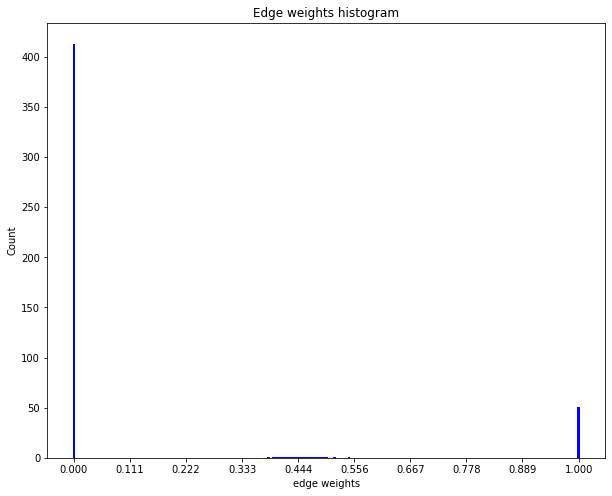

In [123]:
_, weights = G.edges(include_edge_weight=True)

wt, cnt = np.unique(weights, return_counts=True)

plt.figure(figsize=(10, 8))
plt.bar(wt, cnt, width=0.005, color="b")
plt.title("Edge weights histogram")
plt.ylabel("Count")
plt.xlabel("edge weights")
plt.xticks(np.linspace(0, 1, 10))

plt.show()

In [124]:
rw = BiasedRandomWalk(G)

In [125]:
weighted_walks = rw.run(
    nodes=G.nodes(),  # root nodes
    length=walk_length,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
    weighted=True,  # for weighted random walks
    seed=42,  # random seed fixed for reproducibility
)
print("Number of random walks: {}".format(len(weighted_walks)))

Number of random walks: 2400


In [126]:
weighted_model = Word2Vec(
    weighted_walks, size=128, window=5, min_count=0, sg=1, workers=1, iter=1
)

In [127]:
# The embedding vectors can be retrieved from model.wv using the node ID as key.
# E.g., for node id '19231', the embedding vector is retrieved as
emb = weighted_model.wv["cmo"]
emb.shape

(128,)

In [128]:
# Retrieve node embeddings and corresponding subjects
node_ids = weighted_model.wv.index2word  # list of node IDs
weighted_node_embeddings = (
    weighted_model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
# the gensim ordering may not match the StellarGraph one, so rearrange
node_targets = subjects.loc[node_ids].astype("category")

In [129]:
weighted_node_embeddings.shape

(240, 128)

In [130]:
weighted_node_embeddings

array([[ 0.03660019, -0.15189277, -0.20856193, ..., -0.02917149,
        -0.14408885, -0.6487928 ],
       [ 0.00098864, -0.11609004, -0.19448183, ..., -0.06908295,
        -0.16772988, -0.57203007],
       [ 0.00217784, -0.10606742, -0.21219644, ..., -0.07771917,
        -0.18548916, -0.5576871 ],
       ...,
       [ 0.00388512, -0.00368692,  0.00351112, ...,  0.00267396,
         0.0017684 , -0.0029842 ],
       [-0.0013029 ,  0.00241273, -0.00075109, ..., -0.00216561,
         0.00313768,  0.00240249],
       [-0.00123634,  0.00300394,  0.00365624, ..., -0.00307875,
         0.00371604,  0.00386411]], dtype=float32)

In [131]:
# Apply t-SNE transformation on node embeddings
tsne = TSNE(n_components=2, random_state=42)
weighted_node_embeddings_2d = tsne.fit_transform(weighted_node_embeddings)

### Plot the embeddings generated from weighted random walks

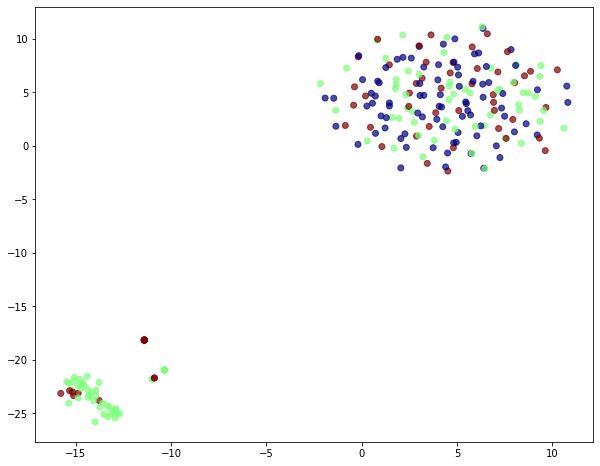

In [132]:
# draw the points
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    weighted_node_embeddings_2d[:, 0],
    weighted_node_embeddings_2d[:, 1],
    c=node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()

In [133]:
# X will hold the 128-dimensional input features
X = weighted_node_embeddings
# y holds the corresponding target values
y = np.array(node_targets)

#### Train and Test split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.75, test_size=None, random_state=42
)
print(
    "Array shapes:\n X_train = {}\n y_train = {}\n X_test = {}\n y_test = {}".format(
        X_train.shape, y_train.shape, X_test.shape, y_test.shape
    )
)

Array shapes:
 X_train = (180, 128)
 y_train = (180,)
 X_test = (60, 128)
 y_test = (60,)


In [135]:
y_test 

array(['both', 'both', 'dead', 'both', 'dead', 'alive', 'alive', 'alive',
       'both', 'alive', 'both', 'dead', 'alive', 'alive', 'both', 'alive',
       'both', 'dead', 'dead', 'both', 'both', 'both', 'dead', 'both',
       'dead', 'dead', 'both', 'both', 'both', 'alive', 'both', 'alive',
       'both', 'alive', 'both', 'alive', 'alive', 'both', 'dead', 'alive',
       'alive', 'alive', 'alive', 'dead', 'dead', 'alive', 'alive',
       'both', 'alive', 'both', 'alive', 'both', 'both', 'both', 'alive',
       'alive', 'both', 'both', 'both', 'alive'], dtype=object)

#### Classifier Training

In [136]:
clf = LogisticRegressionCV(
    Cs=10,
    cv=10,
    tol=0.001,
    max_iter=1000,
    scoring="accuracy",
    verbose=False,
    multi_class="ovr",
    random_state=5434,
)
clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='ovr', n_jobs=None,
                     penalty='l2', random_state=5434, refit=True,
                     scoring='accuracy', solver='lbfgs', tol=0.001,
                     verbose=False)

In [137]:
y_pred = clf.predict(X_test)

In [138]:
accuracy_score(y_test, y_pred)

0.5333333333333333

In [139]:
X_test

array([[-4.9189159e-01,  6.2106520e-02, -9.6321009e-02, ...,
        -5.2074271e-01, -1.6528310e-01, -5.5296665e-01],
       [ 4.5863506e-03, -1.0944619e-01, -2.2038788e-01, ...,
        -6.9726221e-02, -1.8888341e-01, -5.8502847e-01],
       [ 2.2983430e-03,  2.5878137e-03, -3.8601735e-04, ...,
        -8.0394333e-05,  1.0009737e-03,  2.1703939e-03],
       ...,
       [ 1.1622057e-03, -1.6271033e-04, -1.0620001e-03, ...,
         3.2372861e-03, -1.7486954e-03, -6.3100836e-04],
       [ 1.0724403e-03, -1.1903564e-03, -1.3442101e-03, ...,
         3.5509944e-03, -8.1511505e-04, -2.9144052e-03],
       [-1.6097123e-03, -1.8325011e-03,  3.6596593e-03, ...,
        -7.4188586e-04, -7.6062616e-04, -3.3259094e-03]], dtype=float32)

In [140]:
y_test

array(['both', 'both', 'dead', 'both', 'dead', 'alive', 'alive', 'alive',
       'both', 'alive', 'both', 'dead', 'alive', 'alive', 'both', 'alive',
       'both', 'dead', 'dead', 'both', 'both', 'both', 'dead', 'both',
       'dead', 'dead', 'both', 'both', 'both', 'alive', 'both', 'alive',
       'both', 'alive', 'both', 'alive', 'alive', 'both', 'dead', 'alive',
       'alive', 'alive', 'alive', 'dead', 'dead', 'alive', 'alive',
       'both', 'alive', 'both', 'alive', 'both', 'both', 'both', 'alive',
       'alive', 'both', 'both', 'both', 'alive'], dtype=object)

In [141]:
y_pred

array(['dead', 'both', 'alive', 'alive', 'alive', 'alive', 'alive',
       'alive', 'both', 'dead', 'both', 'dead', 'alive', 'alive', 'alive',
       'alive', 'alive', 'dead', 'alive', 'alive', 'alive', 'both',
       'alive', 'both', 'alive', 'alive', 'both', 'alive', 'alive',
       'alive', 'alive', 'alive', 'dead', 'alive', 'both', 'dead',
       'alive', 'both', 'alive', 'alive', 'dead', 'alive', 'alive',
       'dead', 'alive', 'alive', 'alive', 'both', 'alive', 'alive',
       'alive', 'alive', 'alive', 'dead', 'alive', 'alive', 'alive',
       'alive', 'alive', 'alive'], dtype=object)

In [148]:
# target_names = []
# for k, _ in labels_dict.items():
#     target_names.append(k)
target_names = ['dead', 'alive', 'both']
target_names = sorted(target_names)

from sklearn.metrics import classification_report
import numpy as np

y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))

AxisError: axis 1 is out of bounds for array of dimension 1

### Evaluation part

### Link prediction failed

In [ ]:
import matplotlib.pyplot as plt
from math import isclose
from sklearn.decomposition import PCA
import os
import networkx as nx
import numpy as np
import pandas as pd
from stellargraph import StellarGraph, datasets
from stellargraph.data import EdgeSplitter
from collections import Counter
import multiprocessing
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
graph = StellarGraph(
    {"corner": square_node_data}, {"line": square_edge_data}
)
print(graph.info())

In [ ]:
# Define an edge splitter on the original graph:
edge_splitter_test = EdgeSplitter(graph)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from graph, and obtain the
# reduced graph graph_test with the sampled links removed:
graph_test, examples_test, labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global"
)

print(graph_test.info())

In [ ]:
# Do the same process to compute a training subset from within the test graph
edge_splitter_train = EdgeSplitter(graph_test, graph)
graph_train, examples, labels = edge_splitter_train.train_test_split(
    p=0.1, method="global"
)
(
    examples_train,
    examples_model_selection,
    labels_train,
    labels_model_selection,
) = train_test_split(examples, labels, train_size=0.75, test_size=0.25)

print(graph_train.info())

In [ ]:
pd.DataFrame(
    [
        (
            "Training Set",
            len(examples_train),
            "Train Graph",
            "Test Graph",
            "Train the Link Classifier",
        ),
        (
            "Model Selection",
            len(examples_model_selection),
            "Train Graph",
            "Test Graph",
            "Select the best Link Classifier model",
        ),
        (
            "Test set",
            len(examples_test),
            "Test Graph",
            "Full Graph",
            "Evaluate the best Link Classifier",
        ),
    ],
    columns=("Split", "Number of Examples", "Hidden from", "Picked from", "Use"),
).set_index("Split")

In [ ]:
p = 1.0
q = 1.0
dimensions = 128
num_walks = 10
walk_length = 80
window_size = 10
num_iter = 1
workers = multiprocessing.cpu_count()

In [ ]:
from stellargraph.data import BiasedRandomWalk
from gensim.models import Word2Vec


def node2vec_embedding(graph, name):
    rw = BiasedRandomWalk(graph)
    walks = rw.run(graph.nodes(), n=num_walks, length=walk_length, p=p, q=q)
    print(f"Number of random walks for '{name}': {len(walks)}")

    model = Word2Vec(
        walks,
        size=dimensions,
        window=window_size,
        min_count=0,
        sg=1,
        workers=workers,
        iter=num_iter,
    )

    def get_embedding(u):
        return model.wv[u]

    return get_embedding

In [ ]:
embedding_train = node2vec_embedding(graph_train, "Train Graph")

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler


# 1. link embeddings
def link_examples_to_features(link_examples, transform_node, binary_operator):
    return [
        binary_operator(transform_node(src), transform_node(dst))
        for src, dst in link_examples
    ]


# 2. training classifier
def train_link_prediction_model(
    link_examples, link_labels, get_embedding, binary_operator
):
    clf = link_prediction_classifier()
    link_features = link_examples_to_features(
        link_examples, get_embedding, binary_operator
    )
    clf.fit(link_features, link_labels)
    return clf


def link_prediction_classifier(max_iter=2000):
    lr_clf = LogisticRegressionCV(Cs=10, cv=10, scoring="roc_auc", max_iter=max_iter)
    return Pipeline(steps=[("sc", StandardScaler()), ("clf", lr_clf)])


# 3. and 4. evaluate classifier
def evaluate_link_prediction_model(
    clf, link_examples_test, link_labels_test, get_embedding, binary_operator
):
    link_features_test = link_examples_to_features(
        link_examples_test, get_embedding, binary_operator
    )
    score = evaluate_roc_auc(clf, link_features_test, link_labels_test)
    return score


def evaluate_roc_auc(clf, link_features, link_labels):
    predicted = clf.predict_proba(link_features)

    # check which class corresponds to positive links
    positive_column = list(clf.classes_).index(1)
    return roc_auc_score(link_labels, predicted[:, positive_column])

In [ ]:
def operator_hadamard(u, v):
    return u * v


def operator_l1(u, v):
    return np.abs(u - v)


def operator_l2(u, v):
    return (u - v) ** 2


def operator_avg(u, v):
    return (u + v) / 2.0


def run_link_prediction(binary_operator):
    clf = train_link_prediction_model(
        examples_train, labels_train, embedding_train, binary_operator
    )
    score = evaluate_link_prediction_model(
        clf,
        examples_model_selection,
        labels_model_selection,
        embedding_train,
        binary_operator,
    )

    return {
        "classifier": clf,
        "binary_operator": binary_operator,
        "score": score,
    }


binary_operators = [operator_hadamard, operator_l1, operator_l2, operator_avg]

In [ ]:
results = [run_link_prediction(op) for op in binary_operators]
best_result = max(results, key=lambda result: result["score"])

print(f"Best result from '{best_result['binary_operator'].__name__}'")

pd.DataFrame(
    [(result["binary_operator"].__name__, result["score"]) for result in results],
    columns=("name", "ROC AUC score"),
).set_index("name")

### Cora dataset

In [ ]:
cora_cites_file

In [ ]:
from stellargraph.datasets import Cora
import os

cora = Cora()
cora.download()

# the base_directory property tells us where it was downloaded to:
cora_cites_file = os.path.join(cora.base_directory, "cora.cites")
cora_content_file = os.path.join(cora.base_directory, "cora.content")

In [ ]:
cora_cites = pd.read_csv(
    cora_cites_file,
    sep="\t",  # tab-separated
    header=None,  # no heading row
    names=["target", "source"],  # set our own names for the columns
)
cora_cites

In [ ]:
cora_feature_names = [f"w{i}" for i in range(1433)]

cora_raw_content = pd.read_csv(
    cora_content_file,
    sep="\t",  # tab-separated
    header=None,  # no heading row
    names=["id", *cora_feature_names, "subject"],  # set our own names for the columns
)
cora_raw_content

In [ ]:
cora_content_str_subject = cora_raw_content.set_index("id")
cora_content_str_subject

### 1. Removing columns

In [ ]:
cora_content_no_subject = cora_content_str_subject.drop(columns="subject")
cora_content_no_subject

In [ ]:
cora_no_subject = StellarGraph({"paper": cora_content_no_subject}, {"cites": cora_cites})
print(cora_no_subject.info())

In [ ]:
cora_subject = cora_content_str_subject["subject"]
cora_subject